# handling imbalanced dataset

In [22]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
import matplotlib.pyplot as plt

In [2]:
#importing (imbalanced) data
df=pd.read_csv("temporary/df_train_set.csv",index_col="smiles")
df.drop(["Id"], axis=1, inplace=True)
df.head()


,sol_category,ecfp_0,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,ecfp_6,ecfp_7,ecfp_8,...,rdkit_desc_fr_sulfide,rdkit_desc_fr_sulfonamd,rdkit_desc_fr_sulfone,rdkit_desc_fr_term_acetylene,rdkit_desc_fr_tetrazole,rdkit_desc_fr_thiazole,rdkit_desc_fr_thiocyan,rdkit_desc_fr_thiophene,rdkit_desc_fr_unbrch_alkane,rdkit_desc_fr_urea
smiles,,,,,,,,,,,,,,,,,,,,,
Cc1nc(N2CCN(C(=O)Nc3ccc(F)cc3F)CC2)cc(-n2ccnc2)n1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CCN(CC)[C@H]1CCN(C(=O)Cc2nc(C(C)C)c(C)s2)C1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
CNC(=O)CNC(=O)c1c(-n2cccc2)sc(C)c1C,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CC[C@H](NC(=O)c1ccnc(-n2ccnc2)c1)c1ccccc1OC,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#define y as label and x as features from dataframe
x=df.drop(["sol_category"], axis=1)
y=df["sol_category"]

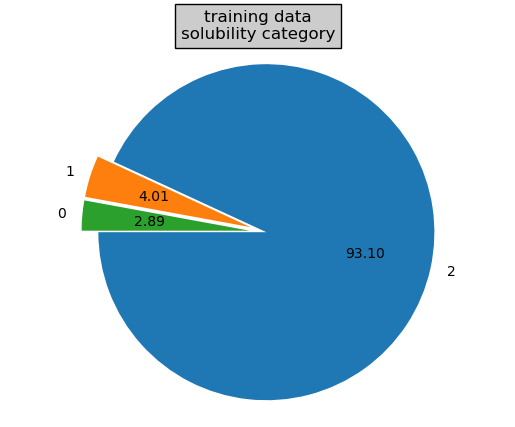

In [25]:
def make_pie(y):
    explode = (0.0, 0.1, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(y.value_counts(), explode=explode, autopct="%.2f", labels=y.value_counts().index, startangle=180)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title("training data\n" + "solubility category", bbox={'facecolor':'0.8', 'pad':4})
    plt.show

make_pie(y)


In [31]:
x_train_0, x_test_0, y_train_0, y_test_0=train_test_split(x,y,test_size=6/7, random_state=12)

print(y_train_0.value_counts(normalize=True))
print(y_test_0.value_counts(normalize=True))

2    0.929116
1    0.041283
0    0.029601
Name: sol_category, dtype: float64
2    0.931364
1    0.039894
0    0.028741
Name: sol_category, dtype: float64


# transform into stratified train and test split
### retain same ratio of classes in both train and test set

In [32]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=6/7, random_state=12, stratify=y)
y_train
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

2    0.930997
1    0.040095
0    0.028908
Name: sol_category, dtype: float64
2    0.931051
1    0.040092
0    0.028857
Name: sol_category, dtype: float64


# grid search to find optimal hyper parameters for

##### svc: svm.LinearSVC,
##### random forest classifier: ensemble.RandomForestClassifier,
##### fnn: neural_network.MLPClassifier,
##### xgboost: XGClassifier,
##### logistic regression: sklearn.linear_model.LogisticRegression



In [5]:
accurancy=[]
skf=StratifiedKFold(n_splits=5, random_state=None)
skf.get_n_splits(X,Y)

for train_index, test_index in skf.split(X,Y):
    

SyntaxError: expected ':' (213326505.py, line 5)